In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive')
!pwd

/content/drive/My Drive


In [3]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [4]:
import pandas as pd
import numpy as np
from skimage.io import imread
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# %matplotlib inline
from PIL import Image
from keras import regularizers
import keras
from keras import optimizers
# from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate
from keras.layers.advanced_activations import ReLU
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
import random
import math
import matplotlib.image as mpimg
import cv2
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

from keras import layers, models

In [5]:
IMG_WIDTH=640
IMG_HEIGHT=480
path='theta-folder'
size = 640, 480

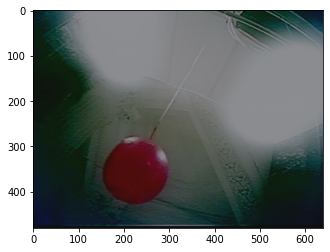

In [25]:
# img1 = Image.open('image1.1.png')
# img1.size
# fig, ax = plt.subplots()
# ax.imshow(img1)

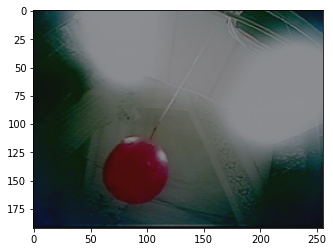

In [26]:
# img1.thumbnail((256,256))

# fig, ax = plt.subplots()
# ax.imshow(img1)

In [5]:
def create_dataset(path):
  img_data_array = []
  for img in os.listdir(path):
    
    image= Image.open(os.path.join(path,img))
    image = image.resize((640, 480))
    # image=Image.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
    # print(image)
    image=np.array(image)
    image = image.astype('float32')
    image /= 255 
    # print(image)
    img_data_array.append(image)


  return img_data_array
# extract the image array and class name
img_data=create_dataset('theta-folder')

In [6]:
  # img_data

[array([[[0.2901961 , 0.34117648, 0.40784314],
         [0.29803923, 0.34901962, 0.41568628],
         [0.30588236, 0.35686275, 0.42352942],
         ...,
         [0.10588235, 0.2509804 , 0.28235295],
         [0.10588235, 0.2509804 , 0.27450982],
         [0.12156863, 0.27058825, 0.28235295]],
 
        [[0.22352941, 0.29803923, 0.3647059 ],
         [0.22352941, 0.29803923, 0.3647059 ],
         [0.21960784, 0.29411766, 0.36078432],
         ...,
         [0.05882353, 0.21176471, 0.23137255],
         [0.03921569, 0.19607843, 0.20392157],
         [0.03529412, 0.19215687, 0.19215687]],
 
        [[0.1764706 , 0.28235295, 0.34901962],
         [0.1764706 , 0.28235295, 0.34901962],
         [0.16862746, 0.27450982, 0.34117648],
         ...,
         [0.03529412, 0.20784314, 0.21176471],
         [0.01176471, 0.17254902, 0.18039216],
         [0.00392157, 0.16078432, 0.16078432]],
 
        ...,
 
        [[0.5176471 , 0.53333336, 0.5764706 ],
         [0.5176471 , 0.53333336, 0.57647

In [7]:
train_data = np.asarray(img_data)
train_data.shape

(1200, 480, 640, 3)

In [ ]:
y_train = pd.read_csv('labels-theta.csv')

In [ ]:
num_classes = 3

In [ ]:
# train_data = np.array(train_data.iloc[:,:])
# train_data = np.array([np.reshape(i,(128,128)) for i in train_data])
# target_data = np.array(target_data.iloc[:,:])
# target_data = np.array([np.reshape(i,(128,128)) for i in target_data])

In [ ]:
train_data.shape
# target_data.shape

(400, 128, 128, 3)

In [ ]:
# train_data = train_data.astype('float32')
# train_data = train_data/255

# rgb_batch = np.repeat(train_data[..., np.newaxis], 3, -1)
# rgb_batch.shape

# target_data = target_data.astype('float32')
# target_data = target_data/255

# rgb_target = np.repeat(target_data[..., np.newaxis], 3, -1)
# rgb_target.shape

In [ ]:
# target_data = rgb_target

In [ ]:
# target_data.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data, y_train, test_size = 0.3, random_state=666)

In [ ]:
# print(y_train)

In [ ]:
input_shape = (128, 128, 3)

In [ ]:
target_scaler = MinMaxScaler()
target_scaler.fit(y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
y_train = target_scaler.transform(y_train)
y_test = target_scaler.transform(y_test)

In [ ]:
print(y_test)

[[0.46666667 0.83333333]
 [0.33333333 0.75      ]
 [0.93333333 0.08333333]
 [0.         0.70833333]
 [0.93333333 0.83333333]
 [0.73333333 0.875     ]
 [0.         0.75      ]
 [0.66666667 0.91666667]
 [0.73333333 0.41666667]
 [0.06666667 0.33333333]
 [0.33333333 0.125     ]
 [0.06666667 1.        ]
 [0.8        0.95833333]
 [0.         0.        ]
 [0.26666667 0.70833333]
 [0.8        0.16666667]
 [0.13333333 0.25      ]
 [0.13333333 0.        ]
 [0.2        0.875     ]
 [0.2        0.79166667]
 [0.13333333 0.20833333]
 [0.86666667 0.5       ]
 [0.66666667 0.75      ]
 [0.93333333 0.58333333]
 [0.4        0.70833333]
 [0.         0.95833333]
 [0.53333333 0.66666667]
 [0.66666667 0.54166667]
 [0.66666667 0.16666667]
 [0.13333333 0.16666667]
 [0.73333333 0.45833333]
 [1.         0.83333333]
 [0.93333333 0.41666667]
 [0.13333333 0.58333333]
 [0.06666667 0.95833333]
 [0.66666667 0.375     ]
 [0.53333333 0.83333333]
 [0.53333333 0.25      ]
 [0.6        0.70833333]
 [0.26666667 0.95833333]


In [ ]:
def create_model():
  model = Sequential()
  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))#
  model.add(layers.MaxPooling2D((2, 2), strides = 2))
  model.add(layers.Dropout(0.25))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2), strides = 2))
  model.add(layers.Conv2D(256, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(2, activation='linear'))

  model.compile(optimizer= Adam(0.0001),#"adam",
              loss='mean_squared_error',
              metrics=['mse'])
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 256)       295168    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 256)      

In [ ]:
# best_weights_file="weights.aug.best.hdf5"
# checkpoint = ModelCheckpoint(best_weights_file, monitor='val_mse', verbose=1, save_best_only=True, mode='max')
# callbacks = [checkpoint]

In [ ]:
history = model.fit(x_train, y_train,
          epochs=100,
          validation_split=0.3,
          verbose=1)

Epoch 1/100
7/7 [==============================] - 2s 108ms/step - loss: 0.2331 - mse: 0.2331 - val_loss: 0.1746 - val_mse: 0.1746
Epoch 2/100
7/7 [==============================] - 0s 38ms/step - loss: 0.1151 - mse: 0.1151 - val_loss: 0.1779 - val_mse: 0.1779
Epoch 3/100
7/7 [==============================] - 0s 39ms/step - loss: 0.1271 - mse: 0.1271 - val_loss: 0.1641 - val_mse: 0.1641
Epoch 4/100
7/7 [==============================] - 0s 44ms/step - loss: 0.1249 - mse: 0.1249 - val_loss: 0.1760 - val_mse: 0.1760
Epoch 5/100
7/7 [==============================] - 0s 38ms/step - loss: 0.1201 - mse: 0.1201 - val_loss: 0.1976 - val_mse: 0.1976
Epoch 6/100
7/7 [==============================] - 0s 39ms/step - loss: 0.1207 - mse: 0.1207 - val_loss: 0.1695 - val_mse: 0.1695
Epoch 7/100
7/7 [==============================] - 0s 39ms/step - loss: 0.1325 - mse: 0.1325 - val_loss: 0.1922 - val_mse: 0.1922
Epoch 8/100
7/7 [==============================] - 0s 42ms/step - loss: 0.1187 - mse: 0.1

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 14ms/step - loss: 0.1088 - mse: 0.1088


[0.10876136273145676, 0.10876136273145676]

In [ ]:
prediction = model.predict(x_test)
prediction = target_scaler.inverse_transform(prediction)
prediction = np.rint(prediction)

In [ ]:
print(prediction)

[[  4. -10.]
 [  3. -11.]
 [ 16. -18.]
 [  3. -11.]
 [ 14.  -4.]
 [  9.  -4.]
 [  4. -11.]
 [  4. -10.]
 [ 18. -10.]
 [  3. -12.]
 [  4. -14.]
 [  3. -15.]
 [  9.  -4.]
 [  2. -14.]
 [  3. -11.]
 [ 18. -16.]
 [  3. -12.]
 [  3. -12.]
 [  4. -10.]
 [  4. -11.]
 [  3. -13.]
 [ 12. -16.]
 [ 11.  -8.]
 [ 19.   2.]
 [  3. -12.]
 [  3. -14.]
 [  4. -11.]
 [ 17.  -8.]
 [  7. -22.]
 [  3. -13.]
 [ 13. -17.]
 [ 22.  -2.]
 [ 18.  -8.]
 [  3. -12.]
 [  3. -12.]
 [ 15. -12.]
 [  4. -10.]
 [  9. -20.]
 [  4. -11.]
 [  3. -11.]
 [ 12.  -6.]
 [ 12.  -1.]
 [  4. -20.]
 [  2. -20.]
 [  4.  -9.]
 [  5. -18.]
 [ 10. -19.]
 [  8. -15.]
 [  4.  -9.]
 [  9. -21.]
 [ 19. -11.]
 [ 20.  -1.]
 [ 15. -16.]
 [ 11.  -3.]
 [ 15. -14.]
 [  5.  -8.]
 [  5. -19.]
 [  7. -12.]
 [  3. -12.]
 [  3. -15.]
 [ 15. -19.]
 [  4. -13.]
 [  3. -11.]
 [ 10.  -3.]
 [  4. -11.]
 [  3. -12.]
 [  3. -12.]
 [ 18. -18.]
 [ 22.   2.]
 [ 18.  -8.]
 [ 18. -15.]
 [ 17.   2.]
 [  3. -12.]
 [  6. -18.]
 [ 15.  -1.]
 [  6. -19.]
 [  6. -16.]

In [ ]:
ground_truth = target_scaler.inverse_transform(y_test)

In [ ]:
print(ground_truth)

[[ 14.  16.]
 [ 10.  12.]
 [ 28. -20.]
 [  0.  10.]
 [ 28.  16.]
 [ 22.  18.]
 [  0.  12.]
 [ 20.  20.]
 [ 22.  -4.]
 [  2.  -8.]
 [ 10. -18.]
 [  2.  24.]
 [ 24.  22.]
 [  0. -24.]
 [  8.  10.]
 [ 24. -16.]
 [  4. -12.]
 [  4. -24.]
 [  6.  18.]
 [  6.  14.]
 [  4. -14.]
 [ 26.   0.]
 [ 20.  12.]
 [ 28.   4.]
 [ 12.  10.]
 [  0.  22.]
 [ 16.   8.]
 [ 20.   2.]
 [ 20. -16.]
 [  4. -16.]
 [ 22.  -2.]
 [ 30.  16.]
 [ 28.  -4.]
 [  4.   4.]
 [  2.  22.]
 [ 20.  -6.]
 [ 16.  16.]
 [ 16. -12.]
 [ 18.  10.]
 [  8.  22.]
 [ 26.  16.]
 [ 16.  24.]
 [ 18. -12.]
 [  0. -18.]
 [ 14.  18.]
 [ 12.   0.]
 [ 16.  -6.]
 [ 16.  -2.]
 [  8.  18.]
 [ 14. -16.]
 [ 22.  -6.]
 [ 26.  18.]
 [ 22. -16.]
 [ 30.  24.]
 [ 24. -12.]
 [ 18.  18.]
 [ 12. -24.]
 [ 18.   2.]
 [  0.  18.]
 [  2. -16.]
 [ 20. -20.]
 [ 14.   4.]
 [  8.  12.]
 [ 20.  14.]
 [ 12.   6.]
 [  2.   8.]
 [  4.   0.]
 [ 20. -22.]
 [ 28.   0.]
 [ 30. -14.]
 [ 30. -20.]
 [ 28.  20.]
 [  2.  -4.]
 [ 18. -10.]
 [ 30.  22.]
 [ 14.  -4.]
 [ 12.  -6.]

In [ ]:
np.savetxt('predictions.csv', prediction, delimiter=",")

In [ ]:
y_test.to_numpy()

array([[ 35, -13,   0,   7],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       ...,
       [-25, -18,   0,  -3],
       [  0,   0,   0,   0],
       [ 25, -18,   0,   2]])

In [ ]:
np.savetxt('ground_truth.csv', y_test, delimiter=',')

In [ ]:
# import cv2
# from google.colab.patches import cv2_imshow
# img1 = cv2.imread('data65_27.png')
# img2 = cv2.imread('target_image_1.png')
#mg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img1 = cv2.resize(img1, dsize=(128,128), interpolation = cv2.INTER_CUBIC)
# plt.imshow(img1)
# img1.shape

# img1 = np.expand_dims(img1, axis = 0)
# img1 = np.expand_dims(img1, axis = 3)
# img1 = img1.astype('float32')
# img1 = img1/255
# plt.imshow(img1.reshape(128,128), cmap = plt.cm.binary)

In [ ]:
# from PIL import Image
# # Open the image form working directory
# img1 = Image.open('/content/data65_27.png')
# img2 = Image.open('/content/target_image_1.png')

In [ ]:
# from matplotlib import image
# from matplotlib import pyplot
# # load image as pixel array
# img1 = image.imread('/content/data65_27.png')
# img2 = image.imread('/content/target_image_1.png')

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('test8_res_res_res_res_res_res_res_res_000011.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img= cv2.resize(img, dsize=(128,128), interpolation = cv2.INTER_CUBIC)
# plt.imshow(img)
img.shape

img = np.reshape(img, (1, 128, 128))
# img = np.expand_dims(img, axis = 0)
# img = np.expand_dims(img, axis = 3)
# img = np.reshape(128,128)
# img = img.astype('float32')
img = img/255
img = np.repeat(img[..., np.newaxis], 3, -1)
# plt.imshow(img.reshape(128,128), cmap = plt.cm.binary)

In [ ]:
img.shape

(1, 128, 128, 3)

In [ ]:
img2 = cv2.imread('target_image.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2= cv2.resize(img2, dsize=(128,128), interpolation = cv2.INTER_CUBIC)
# plt.imshow(img)
img2.shape

img2 = np.reshape(img2, (1, 128, 128))
# img = np.expand_dims(img, axis = 0)
# img = np.expand_dims(img, axis = 3)
# img = np.reshape(128,128)
# img = img.astype('float32')
img2 = img2/255
img2 = np.repeat(img2[..., np.newaxis], 3, -1)
# plt.imshow(img.reshape(128,128), cmap = plt.cm.binary)

In [ ]:
img2.shape

(1, 128, 128, 3)

In [ ]:
predictionimg = model.predict([img,img2])
predictionimg = np.rint(predictionimg)

In [ ]:
predictionimg

array([[-17.,  -3.,  -5.,   3.]], dtype=float32)